# Making geologic cross sections from well logs

In [ ]:
! pip install glob
! pip install lasio

In [1]:
#let's import some packages we are going to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lasio 
import glob
from textwrap import wrap #for making pretty well names
%matplotlib inline

### Where did this data come from?
The cell below reads in the LAS file names using glob, and then reads in some fake tops I made up for the cross section. These are close to the top of the Niobrara Formation in the Denver Basin of southeast Wyoming. Well log LAS files are from the [WOGCC](http://pipeline.wyo.gov/legacywogcce.cfm) and tops are eyeballed by me and are probably way off.

In [2]:
wells= []
for name in glob.glob('logs/*.las'):
    wells.append(name)
tops = pd.read_csv('logs/ex_tops.csv') #top data

Now let's create a figure and read in well log. We then plot each log by subsea depth so we can see a structural cross section

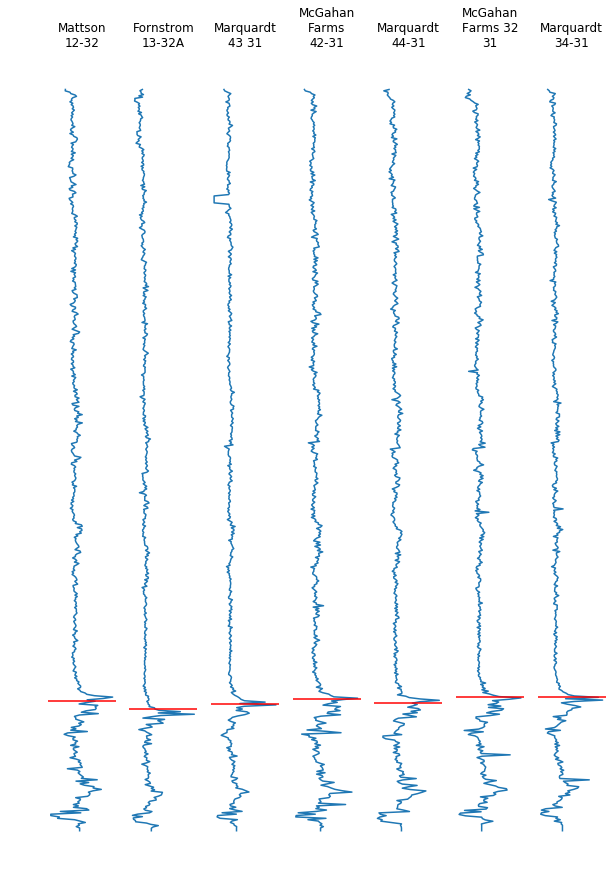

In [3]:
fig = plt.figure(figsize=(10,15)) #set our figure size

for i in range(7): #we read in the 7 logs
    well_log = lasio.read(wells[i]) #this reads in the log
    ax = fig.add_subplot(171+i) #creates a subplot that the curve will be plotted in
    ax.plot(well_log["GR"][::25], well_log['DEPT'][::25]-well_log.params.EKB.value) 
    #this does the plotting, we plot gamma ray as a function of depth. note we subtract the kelly bushing elevation (EKB) to get subsea depth
    #we also downsample the logs so they plot faster
    ax.invert_yaxis()
    #flip the axis so downhole is down in the figure
    ax.axhline(y=tops.loc[i].top-well_log.params.EKB.value , color='r', linestyle='-')
    #let's plot the fake tops from the csv file as a horizontal line, don't forget to subtract the KB elevation for subsea depth
    ax.axis('off')
    #this gets rid of the axis so they look clean
    ax.set_title("\n".join(wrap(well_log.well['WELL'].value, 10)))
    #and let's go ahead and add titles to each log for fun

That's a nice little cross section above, but can we make it better looking? More geologic styling to the gamma-ray curves is possible. Let's investigate this possibility. We will take our plot from above, and we're going to color between the curve and the right hand side. For a full breakdown look at the [coloring well logs notebook](https://github.com/jessepisel/5minutesofpython/blob/master/Well%20log%20plots/gamma%20ray%20colors.ipynb). One last thing we want to do is remove the whitespace between the logs so it looks better and we do that in the last line of the cell

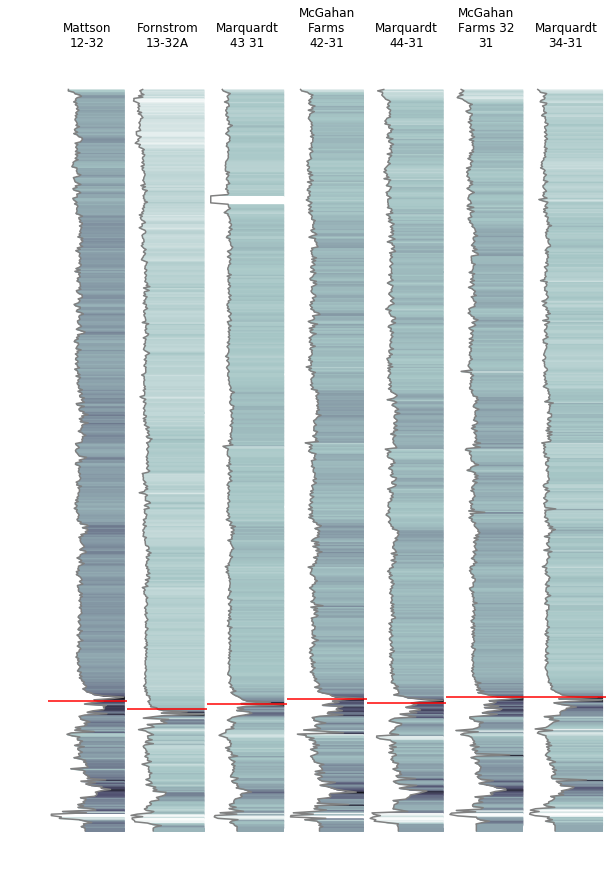

In [4]:
import matplotlib as mpl #for making a colormap
cmap = mpl.cm.bone_r #select our color map

fig = plt.figure(figsize=(10,15)) #set our figure size


for i in range(7): #we read in the 7 logs
    well_log = lasio.read(wells[i]) #this reads in the log
    x = well_log["GR"][::25] #assign the GR values to x
    y = well_log['DEPT'][::25]-well_log.params.EKB.value #assign the depth values to y
    z = x #create a third variable for the colors, you could have fun and make this another curve as well
    normalize = mpl.colors.Normalize(vmin=z.min(), vmax=z.max())
    
    ax = fig.add_subplot(171+i) #creates a subplot that the curve will be plotted in
    ax.plot(x, y, color='gray') 
    #this does the plotting, we plot gamma ray as a function of depth. note we subtract the kelly bushing elevation (EKB) to get subsea depth 
    ax.invert_yaxis()
    #flip the axis so downhole is down in the figure
    ax.axhline(y=tops.loc[i].top-well_log.params.EKB.value , color='r', linestyle='-')
    for i in range(x.size - 1):
        plt.fill_betweenx([y[i], y[i+1]], [x[i], x[i+1]], x2=z.max(), color=cmap(normalize(z[i])))
    #let's plot the fake tops from the csv file as a horizontal line, don't forget to subtract the KB elevation for subsea depth
    ax.axis('off')
    #this gets rid of the axis so they look clean
    ax.set_title("\n".join(wrap(well_log.well['WELL'].value, 10)))
    #and let's go ahead and add titles to each log for fun
plt.subplots_adjust(wspace=0, hspace=0)

This notebook is licensed as CC-BY, use and share to your hearts content.